In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
from src.LE_LoadAndMerge import *
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [144]:
USeast = MultiModelLargeEnsemble(models=['CanESM5','cesm_lens','ACCESS-ESM1-5',
                                         'MIROC6','MPI-ESM1-2-LR'],
                                 variable='pr', granularity='day', lat=41.3, lon=-72.5,
                                 bucket='climateai_data_repository', path='tmp/internal_variability',
                                 load=True)

In [151]:
USeast.hist.pr[1, :, :] *= 997

In [152]:
USeast.future.pr[1, :, :] *= 997

In [153]:
USeast.hist.load()

<xarray.Dataset>
Dimensions:    (member: 50, time: 7305, model: 5)
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * time       (time) datetime64[ns] 1995-01-01 1995-01-02 ... 2014-12-31
    member_id  (model, member) object 'r10i1p2f1' 'r11i1p1f1' ... nan nan
  * model      (model) <U13 'CanESM5' 'cesm_lens' ... 'MIROC6' 'MPI-ESM1-2-LR'
Data variables:
    pr         (model, member, time) float32 1.883e-05 7.881e-05 ... nan nan
Attributes: (12/49)
    CCCma_model_hash:           Unknown
    CCCma_parent_runid:         p2-pictrl
    CCCma_pycmor_hash:          33c30511acc319a98240633965a04ca99c26427e
    Conventions:                CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:  1850:01:01:00
    activity_id:                CMIP
    ...                         ...
    table_info:                 Creation Date:(20 February 2019) MD5:374fbe5a...
    title:                      CanESM5 output prepared for CMIP6
    tracking_id:                hdl:21.14100/2c5b35e9-b26b-48c6-8467-65876c54...
    variable_id:                pr
    version:                    v20190429
    version_id:                 v20190429

In [154]:
USeast.future.load()

<xarray.Dataset>
Dimensions:    (member: 50, time: 31411, model: 5)
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * time       (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2100-12-31
    member_id  (model, member) object 'r16i1p2f1' 'r16i1p1f1' ... nan nan
  * model      (model) <U13 'CanESM5' 'cesm_lens' ... 'MIROC6' 'MPI-ESM1-2-LR'
Data variables:
    pr         (model, member, time) float32 0.0001264 0.0003631 ... nan nan
Attributes: (12/48)
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   2015:01:01:00
    YMDH_branch_time_in_parent:  2015:01:01:00
    activity_id:                 ScenarioMIP
    branch_method:               Spin-up documentation
    ...                          ...
    table_info:                  Creation Date:(20 February 2019) MD5:374fbe5...
    title:                       CanESM5 output prepared for CMIP6
    tracking_id:                 hdl:21.14100/3b6f57c2-2b94-43a0-a8f8-466738d...
    variable_id:                 pr
    version:                     v20190429
    version_id:                  v20190429

In [155]:
np.isfinite(USeast.hist.tas.isel(model=-1)).sum('time')

AttributeError: 'Dataset' object has no attribute 'tas'

In [143]:
np.isfinite(USeast.hist.tas.isel(model=-2)).sum('time')

<xarray.DataArray 'tas' (member: 71)>
array([7305, 7305, 7305, 7305, 7305, 7305, 7305, 7305, 7305, 7305,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0])
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 62 63 64 65 66 67 68 69 70
    member_id  (member) object 'r1i1p1f1' 'r10i1p1f1' 'r8i1p1f1' ... nan nan nan
    model      <U13 'MPI-ESM1-2-LR'

In [84]:
np.isfinite(USeast.future.tas.isel(model=-1)).sum('time')

<xarray.DataArray 'tas' (member: 58)>
array([31411, 31411, 31411, 31411, 31411, 31411, 31411, 31411, 31411,
       31411, 31411, 31411, 31411, 31411, 31411, 31411, 31411, 31411,
       31411, 31411, 31411, 31411, 31411, 31411, 31411, 31411, 31411,
       31411, 31411, 31411, 31411, 31411, 31411, 31411, 31411, 31411,
       31411, 31411, 31411, 31411, 31411, 31411, 31411, 31411, 31411,
       31411, 31411, 31411, 31411, 31411, 31411, 31411, 31411, 31411,
       31411, 31411, 31411, 31411])
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 49 50 51 52 53 54 55 56 57
    member_id  (member) object 'r6i1p1f1' 'r9i1p1f1' ... 'r4i1p1f1' 'r3i1p1f1'
    model      <U13 'EC-Earth3'

In [157]:
hist = USeast.hist.pr
future = USeast.future.pr

In [158]:
q99 = hist.quantile(0.99, ('time', 'member'))

In [159]:
q99

<xarray.DataArray 'pr' (model: 5)>
array([0.00049812, 0.00044308, 0.00056035, 0.00053645, 0.00037756])
Coordinates:
  * model     (model) <U13 'CanESM5' 'cesm_lens' ... 'MIROC6' 'MPI-ESM1-2-LR'
    quantile  float64 0.99

In [160]:
occurance_hist = hist > q99

In [161]:
occurance_hist.sum('time')

<xarray.DataArray 'pr' (model: 5, member: 50)>
array([[ 74,  66,  62,  75,  77,  72,  82,  66, 103,  76,  70,  58,  70,
         73,  72,  65,  72,  65,  79,  73,  79,  65,  65,  71,  70,  63,
         71,  72,  70,  62,  58,  68,  72,  78,  70,  72,  68,  83,  70,
         79,  93,  84,  75,  83,  77,  77,  74,  72,  75,  84],
       [ 72,  82,  74,  69,  79,  69,  66,  74,  68,  58,  71,  80,  64,
         76,  69,  78,  81,  69,  95,  81,  84,  77,  62,  56,  76,  82,
         60,  84,  90,  60,  71,  75,  74,  72,  73,  76,  64,  79,  73,
         57,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 92,  81,  75,  74,  69,  85,  68,  71,  76,  62,  65,  78,  83,
         77,  83,  62,  61,  74,  58,  85,  59,  65,  68,  91,  56,  54,
         79,  74,  70,  71,  81,  81,  87,  70,  72,  76,  69,  80,  67,
         73,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 59,  78,  76,  75,  65,  88,  74,  84,  81,  64,  76,  71,  68,
         75,  79,  71,  73,  86,  69,  72,  69,  63,  58,  92,  70,  91,
         76,  68,  79,  68,  66,  59,  61,  65,  72,  83,  72,  71,  67,
         80,  71,  86,  67,  86,  71,  68,  61,  65,  89,  75],
       [ 65,  67,  80,  73,  84,  67,  61,  74,  85,  75,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
    member_id  (model, member) object 'r10i1p2f1' 'r11i1p1f1' ... nan nan
  * model      (model) <U13 'CanESM5' 'cesm_lens' ... 'MIROC6' 'MPI-ESM1-2-LR'
    quantile   float64 0.99

In [162]:
occurance_hist = occurance_hist.where(np.isfinite(hist), np.NaN)
occurance_hist

<xarray.DataArray 'pr' (model: 5, member: 50, time: 7305)>
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * time       (time) datetime64[ns] 1995-01-01 1995-01-02 ... 2014-12-31
    member_id  (model, member) object 'r10i1p2f1' 'r11i1p1f1' ... nan nan
  * model      (model) <U13 'CanESM5' 'cesm_lens' ... 'MIROC6' 'MPI-ESM1-2-LR'
    quantile   float64 0.99

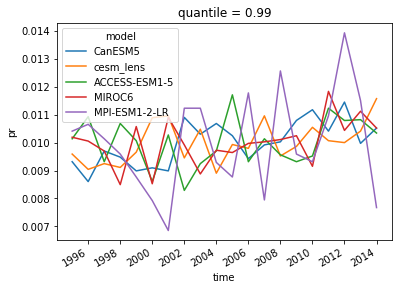

In [163]:
occurance_hist.resample(time='AS').mean().mean('member').plot(hue='model');

In [164]:
occurance_future = future > q99
occurance_future = occurance_future.where(np.isfinite(future), np.NaN)

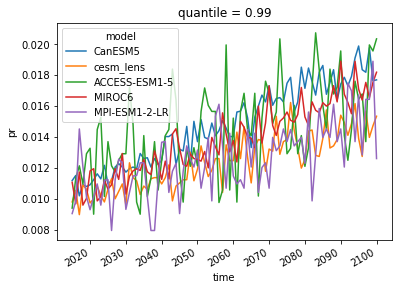

In [165]:
occurance_future.mean('member').resample(time='AS').mean().plot(hue='model');

In [166]:
occurance_future_10yr = occurance_future.resample(time='AS').mean().rolling(
    time=10, center=True).mean()

In [167]:
occurance_future_10yr

<xarray.DataArray 'pr' (model: 5, member: 50, time: 86)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01 2016-01-01 ... 2100-01-01
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
    member_id  (model, member) object 'r16i1p2f1' 'r16i1p1f1' ... nan nan
  * model      (model) <U13 'CanESM5' 'cesm_lens' ... 'MIROC6' 'MPI-ESM1-2-LR'
    quantile   float64 0.99

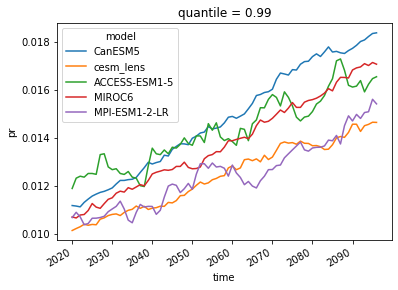

In [168]:
occurance_future_10yr.mean('member').plot(hue='model');

In [169]:
import seaborn as sns

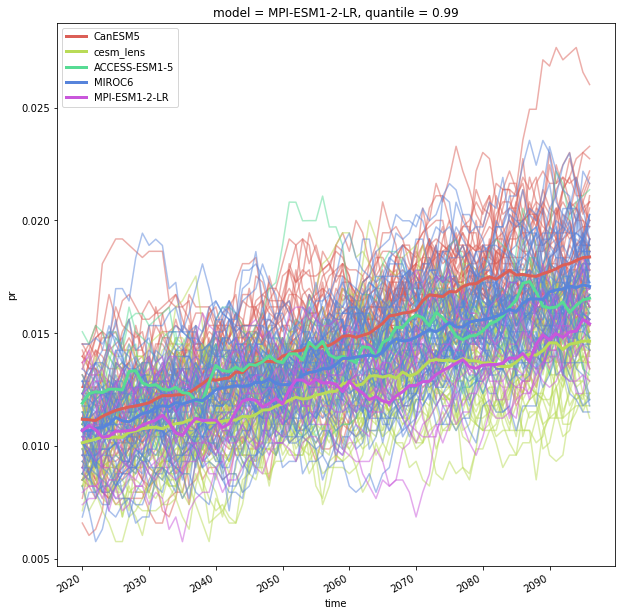

In [170]:
plt.figure(figsize=(10, 10))
colors = sns.color_palette("hls", len(occurance_future_10yr.model))
for i, model in enumerate(occurance_future_10yr.model):
    m = occurance_future_10yr.sel(model=model)
    m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5)
    m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10)
plt.legend()

In [171]:
I = occurance_future_10yr.var('member').mean('model')
I

<xarray.DataArray 'pr' (time: 86)>
array([           nan,            nan,            nan,            nan,
                  nan, 2.92338313e-06, 3.06862966e-06, 3.41155750e-06,
       3.29926558e-06, 3.93967744e-06, 4.20427488e-06, 3.94442896e-06,
       3.93421048e-06, 3.69719689e-06, 3.82903235e-06, 3.81038806e-06,
       3.75678945e-06, 4.28959002e-06, 4.35249722e-06, 4.15516202e-06,
       3.72096835e-06, 3.51791001e-06, 3.18907549e-06, 3.29016838e-06,
       3.30174403e-06, 3.37405828e-06, 3.20433404e-06, 3.52303513e-06,
       3.15338365e-06, 3.23872288e-06, 2.82131754e-06, 3.21263150e-06,
       2.73548058e-06, 2.65889811e-06, 2.51468331e-06, 3.10569262e-06,
       4.13161151e-06, 4.22407554e-06, 4.18766892e-06, 4.15734853e-06,
       4.18377871e-06, 4.58063879e-06, 4.03308326e-06, 4.44314400e-06,
       4.23547291e-06, 3.57815523e-06, 3.46748425e-06, 3.95758084e-06,
       3.81526899e-06, 3.56806292e-06, 3.52536625e-06, 3.67468457e-06,
       3.42430223e-06, 3.54233716e-06, 3.76641493e-06, 4.09272255e-06,
       3.88100490e-06, 3.75170803e-06, 3.70986440e-06, 3.80739304e-06,
       4.01090086e-06, 3.79041619e-06, 3.74205604e-06, 3.32276729e-06,
       3.34703490e-06, 3.08863058e-06, 2.99499047e-06, 3.20078730e-06,
       3.13174801e-06, 3.61134297e-06, 3.86913941e-06, 3.97415750e-06,
       3.94314640e-06, 3.93289270e-06, 4.07142757e-06, 4.38475569e-06,
       4.54567273e-06, 4.34832943e-06, 4.07711689e-06, 4.23284292e-06,
       4.42589920e-06, 4.51729071e-06,            nan,            nan,
                  nan,            nan])
Coordinates:
  * time      (time) datetime64[ns] 2015-01-01 2016-01-01 ... 2100-01-01
    quantile  float64 0.99

In [172]:
M = occurance_future_10yr.mean('member').var('model')
M

<xarray.DataArray 'pr' (time: 86)>
array([           nan,            nan,            nan,            nan,
                  nan, 3.44848786e-07, 4.97753397e-07, 5.17784381e-07,
       5.45061870e-07, 6.26284399e-07, 5.60080565e-07, 5.63006579e-07,
       9.90239060e-07, 9.56271117e-07, 5.29118791e-07, 4.41121376e-07,
       4.47027000e-07, 3.87738714e-07, 3.95111318e-07, 5.90825325e-07,
       5.46970231e-07, 3.61332430e-07, 3.11366001e-07, 3.76047738e-07,
       6.80200602e-07, 9.72732546e-07, 1.03319685e-06, 9.26259181e-07,
       8.75275132e-07, 5.90651040e-07, 7.74530102e-07, 7.71834477e-07,
       8.75307196e-07, 9.28263295e-07, 6.67599589e-07, 7.93673276e-07,
       7.17934656e-07, 6.22529304e-07, 5.58510529e-07, 9.31404172e-07,
       6.61101715e-07, 8.05474471e-07, 5.74215457e-07, 6.32939927e-07,
       7.91011859e-07, 5.85080403e-07, 7.13560027e-07, 9.48625237e-07,
       1.06444407e-06, 1.00599815e-06, 1.45052269e-06, 1.81257581e-06,
       1.87780327e-06, 1.64420833e-06, 1.70672992e-06, 1.82886514e-06,
       1.80678939e-06, 1.76568069e-06, 1.66290379e-06, 1.47757941e-06,
       1.48445707e-06, 1.34957847e-06, 1.41964630e-06, 1.74935133e-06,
       1.81454333e-06, 1.96473894e-06, 2.08030611e-06, 2.04089981e-06,
       2.32338286e-06, 2.48278991e-06, 2.25677070e-06, 2.32763008e-06,
       2.61048427e-06, 1.86190814e-06, 1.44560551e-06, 1.48599322e-06,
       1.47312835e-06, 1.90254163e-06, 1.71454551e-06, 1.73688712e-06,
       1.60752121e-06, 1.68705475e-06,            nan,            nan,
                  nan,            nan])
Coordinates:
  * time      (time) datetime64[ns] 2015-01-01 2016-01-01 ... 2100-01-01
    quantile  float64 0.99

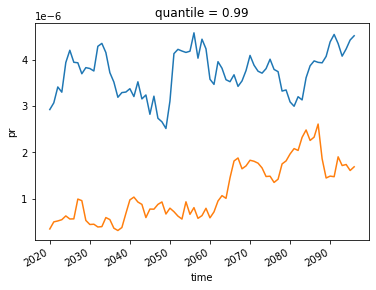

In [173]:
I.plot(label='I')
M.plot(label='M')